# <font color="orange">Part 2B- Regression Algorithms</font>

## <font color="Orange">Predicting revenue using regression models on bigger dataset</font>

### <font color="blue">Data for this assignment is the ecommerece sales data of brazilian company collected from github datasets. Data includes the sales from october 2016 to august 2018(21 months).</font>
* Size of the dataset is: (190634, 11)
* 190634 rows and 11 columns

## <p style="color:blue;">Importing packages</p>

In [124]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

## <p style="color:blue;">Loading/reading dataset</p>

In [125]:
df = pd.read_csv('finalecommdata.csv')
# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(957762, 11)


order_id  order_item_id  \
0  a041155864e5141116458291313b35c2              1   
1  35b8e54d765e6b217e2dc5ab34f6b323              2   
2  35b8e54d765e6b217e2dc5ab34f6b323              2   
3  35b8e54d765e6b217e2dc5ab34f6b323              2   
4  35b8e54d765e6b217e2dc5ab34f6b323              2   

                         product_id   product_category_name  \
0  29bedbfbe73ea473396306b4f0c010ec   utilidades_domesticas   
1  2c41d13dc2cf0e9c2e8db8952f0f3ff3  informatica_acessorios   
2  2c41d13dc2cf0e9c2e8db8952f0f3ff3  informatica_acessorios   
3  2c41d13dc2cf0e9c2e8db8952f0f3ff3  informatica_acessorios   
4  2c41d13dc2cf0e9c2e8db8952f0f3ff3  informatica_acessorios   

                        customer_id payment_type  price  Final_price  \
0  8fbab2ff4df1a7cc9531b14a686bb3ce  credit_card   89.9       117.86   
1  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   38.0       218.87   
2  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   38.0       218.87   
3  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   38.0       218.87   
4  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   38.0       218.87   

            order_date         day  Monthno  
0  2016-10-06 15:56:27  06/10/2016      1.0  
1  2016-10-07 03:10:10  07/10/2016      1.0  
2  2016-10-07 03:10:10  07/10/2016      1.0  
3  2016-10-07 03:10:10  07/10/2016      1.0  
4  2016-10-07 03:10:10  07/10/2016      1.0

In [126]:
df.rename(columns={'Final_price':'revenue'}, inplace=True)


In [127]:
## Order date column to date time format - days/month/year
df.order_date=pd.to_datetime(df['order_date'], format='%Y/%m/%d')

In [128]:
df['Day'] = df['order_date'].dt.day
df['Month'] = df['order_date'].dt.month
df['week'] =df['order_date'].dt.week
df['year'] =df['order_date'].dt.year

In [129]:
df.describe()

order_item_id          price        revenue        Monthno  \
count  957762.000000  957762.000000  957762.000000  957762.000000   
mean        2.239381      92.209220     197.518992      11.501434   
std         2.330910     134.625585     529.854675       4.627331   
min         1.000000       0.850000       0.000000       1.000000   
25%         1.000000      19.900000       6.000000       9.000000   
50%         2.000000      59.900000      21.690000      10.000000   
75%         3.000000      95.000000     172.460000      15.000000   
max        21.000000    6735.000000   13664.080000      21.000000   

                 Day          Month           week           year  
count  957762.000000  957762.000000  957762.000000  957762.000000  
mean       14.256232       6.594617      26.661118    2017.325258  
std         8.181713       2.827354      12.181450       0.472422  
min         1.000000       1.000000       1.000000    2016.000000  
25%         8.000000       4.000000      17.000000    2017.000000  
50%        11.000000       8.000000      31.000000    2017.000000  
75%        22.000000       8.000000      32.000000    2018.000000  
max        31.000000      12.000000      52.000000    2018.000000

## <p style="color:blue;">Basic EDA (Exploratory Data Analysis)</p>

### Top 15 most selling products

In [130]:
item_counts = df['product_category_name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

### Payment types

In [131]:
payments=df['payment_type'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(15,6))
sns.barplot(payments.index, payments.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Payments methods");
plt.xticks(rotation=90);

## <font color="blue">Analysing the dataset further to identify:</font>

* Missing values
* Numerical variables
* Outliers
* Categorical variables
* Variable correlation analysis
* MinMax Scaler and Cat-encoding
* Potential relationship between the variables and the target: Revenue (feature selection)
* Overfitting

### <font color="blue">Missing value</font>

In [132]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values
df[vars_with_na].isnull().mean()

Series([], dtype: float64)

#### <font color="red">No Null values in the data.</font>

### <p style="color:blue;">Numerical variables</p>
### Checking the numerical variables in the dataset

In [133]:
num_vars = [var for var in df.columns if df[var].dtypes != 'O'] #not equal to object type.

print('Number of numerical variables: ', len(num_vars))


df[num_vars].head()

Number of numerical variables:  9


order_item_id  price  revenue          order_date  Monthno  Day  Month  \
0              1   89.9   117.86 2016-10-06 15:56:27      1.0    6     10   
1              2   38.0   218.87 2016-10-07 03:10:10      1.0    7     10   
2              2   38.0   218.87 2016-10-07 03:10:10      1.0    7     10   
3              2   38.0   218.87 2016-10-07 03:10:10      1.0    7     10   
4              2   38.0   218.87 2016-10-07 03:10:10      1.0    7     10   

   week  year  
0    40  2016  
1    40  2016  
2    40  2016  
3    40  2016  
4    40  2016

## Discrete variable analysis

In [134]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    df[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [135]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['revenue'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median revenue')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(df, var)

## Continous variable

In [136]:
contvars = ['order_date','Monthno','week','Day']

In [137]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


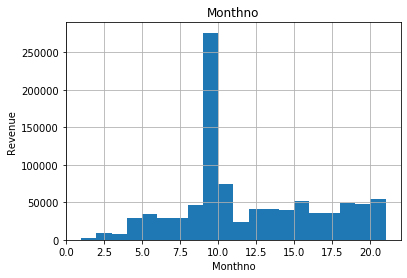

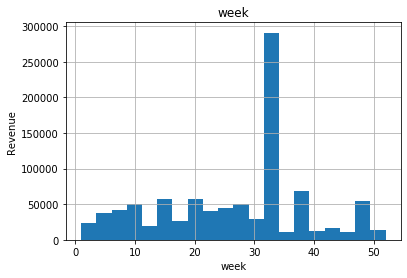

In [138]:
# Selecting only Days and week to analyse the number of product sold in each day and week
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Revenue')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in contvars:
    analyse_continuous(df, var)

## <font color="blue">Outlier Analysis</font>

In [139]:
#dropping the orderdate column
data_wo = df.drop('order_date',axis=1)

In [140]:
#Boxplots to visualise outliers in the continuous variables
def find_outliers(df, var):
    df = df.copy()

   
    if any(df[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()



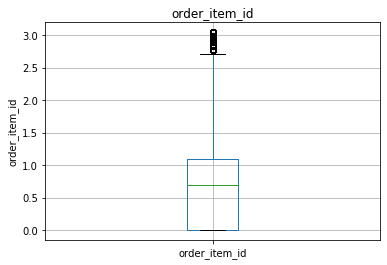

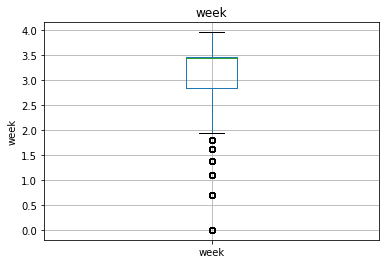

In [141]:
cont_vars.remove('order_date')
for var in cont_vars:
    find_outliers(data_wo, var)

### <font color="blue">Categorical Variable</font>

In [142]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))
df[cat_vars].head()

Number of categorical variables:  6


order_id                        product_id  \
0  a041155864e5141116458291313b35c2  29bedbfbe73ea473396306b4f0c010ec   
1  35b8e54d765e6b217e2dc5ab34f6b323  2c41d13dc2cf0e9c2e8db8952f0f3ff3   
2  35b8e54d765e6b217e2dc5ab34f6b323  2c41d13dc2cf0e9c2e8db8952f0f3ff3   
3  35b8e54d765e6b217e2dc5ab34f6b323  2c41d13dc2cf0e9c2e8db8952f0f3ff3   
4  35b8e54d765e6b217e2dc5ab34f6b323  2c41d13dc2cf0e9c2e8db8952f0f3ff3   

    product_category_name                       customer_id payment_type  \
0   utilidades_domesticas  8fbab2ff4df1a7cc9531b14a686bb3ce  credit_card   
1  informatica_acessorios  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   
2  informatica_acessorios  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   
3  informatica_acessorios  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   
4  informatica_acessorios  1aaa5eaa9dd9bafb385aadc1930ef8e4       boleto   

          day  
0  06/10/2016  
1  07/10/2016  
2  07/10/2016  
3  07/10/2016  
4  07/10/2016

In [143]:
#Unique categorical variables in 6 columns.
df[cat_vars].nunique()

order_id                 97261
product_id               32338
product_category_name       73
customer_id              97261
payment_type                 4
day                        607
dtype: int64

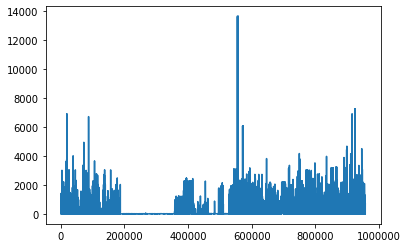

In [144]:
df['revenue'].plot()

In [145]:
## As seen from the plot some values are repeating a lot and it can effect the model 
## products with Two values 16.70 and 2.6
df['revenue'].value_counts()

16.70      95256
2.61       83474
0.28       12016
0.24       11916
2.60       11916
           ...  
77.36          1
149.83         1
1210.62        1
573.68         1
65.98          1
Name: revenue, Length: 28769, dtype: int64

#### 'cama_mesa_banho', 'utilidades_domesticas' and 'automotive' this two product category with revenue 16.70 and 2.61 has been purchased by large number of consumers

In [146]:
df[df['revenue'] == 16.70]['product_category_name'].unique()

array(['cama_mesa_banho', 'utilidades_domesticas'], dtype=object)

In [147]:
df[df['revenue'] == 2.61]['product_category_name'].unique()

array(['cama_mesa_banho', 'utilidades_domesticas', 'automotivo'],
      dtype=object)

### Removing this values as it effected the model and accuracy measured was 28.656. However from business point of view we can't remove values as it decreases efficiency in real time data.

In [148]:
df=df[df.revenue != 16.70] 

In [149]:
df=df[df.revenue != 2.61] 

In [150]:
#from scipy.stats import boxcox
#from numpy import log
#df['revenue'] = log(df['revenue'])

In [151]:
#df['revenue'].plot()

#Input contains NaN, infinity or a value too large for dtype('float64'). logtransform generates infinite value which is not acceptable by ML algorithms

### <font color="blue">Preprocessing MinMax and cat encoding of variables</font>

In [152]:
df['order_id'] = df['order_id'].astype('category').cat.codes
df['product_id'] = df['product_id'].astype('category').cat.codes
df['product_category_name'] = df['product_category_name'].astype('category').cat.codes
df['customer_id'] = df['customer_id'].astype('category').cat.codes
df['payment_type'] = df['payment_type'].astype('category').cat.codes


In [153]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df[['order_item_id']] = min_max_scaler.fit_transform(df[['order_item_id']])
df[['order_id']] = min_max_scaler.fit_transform(df[['order_id']])
df[['product_id']] = min_max_scaler.fit_transform(df[['product_id']])
df[['customer_id']] = min_max_scaler.fit_transform(df[['customer_id']])

In [154]:
df.head()

order_id  order_item_id  product_id  product_category_name  customer_id  \
0  0.622949           0.00    0.166651                     72     0.560714   
1  0.208966           0.05    0.176702                     44     0.104575   
2  0.208966           0.05    0.176702                     44     0.104575   
3  0.208966           0.05    0.176702                     44     0.104575   
4  0.208966           0.05    0.176702                     44     0.104575   

   payment_type  price  revenue          order_date         day  Monthno  Day  \
0             1   89.9   117.86 2016-10-06 15:56:27  06/10/2016      1.0    6   
1             0   38.0   218.87 2016-10-07 03:10:10  07/10/2016      1.0    7   
2             0   38.0   218.87 2016-10-07 03:10:10  07/10/2016      1.0    7   
3             0   38.0   218.87 2016-10-07 03:10:10  07/10/2016      1.0    7   
4             0   38.0   218.87 2016-10-07 03:10:10  07/10/2016      1.0    7   

   Month  week  year  
0     10    40  2016  
1     10    40  2016  
2     10    40  2016  
3     10    40  2016  
4     10    40  2016

### <font color="blue">Correlation analysis</font>

In [155]:
corrmat = df.corr()

In [156]:
corrmat

order_id  order_item_id  product_id  \
order_id               1.000000      -0.092089   -0.261302   
order_item_id         -0.092089       1.000000    0.018358   
product_id            -0.261302       0.018358    1.000000   
product_category_name  0.109862       0.024104   -0.163682   
customer_id           -0.059893       0.177151    0.043256   
payment_type           0.175125      -0.301635   -0.102421   
price                  0.039133      -0.114571   -0.156286   
revenue               -0.108481       0.437419    0.075345   
Monthno               -0.239264       0.056328    0.070276   
Day                    0.124904       0.107211   -0.172451   
Month                  0.092786      -0.044152    0.023856   
week                   0.104580      -0.033572    0.007420   
year                  -0.247159       0.069772    0.046165   

                       product_category_name  customer_id  payment_type  \
order_id                            0.109862    -0.059893      0.175125   
order_item_id                       0.024104     0.177151     -0.301635   
product_id                         -0.163682     0.043256     -0.102421   
product_category_name               1.000000    -0.096125     -0.074870   
customer_id                        -0.096125     1.000000     -0.237956   
payment_type                       -0.074870    -0.237956      1.000000   
price                              -0.010458     0.076645      0.070381   
revenue                             0.037245     0.120868     -0.388079   
Monthno                             0.020893     0.058391     -0.273975   
Day                                 0.101867    -0.009539     -0.086513   
Month                               0.050613    -0.186826      0.088299   
week                                0.060853    -0.193572      0.081207   
year                               -0.008752     0.144928     -0.273690   

                          price   revenue   Monthno       Day     Month  \
order_id               0.039133 -0.108481 -0.239264  0.124904  0.092786   
order_item_id         -0.114571  0.437419  0.056328  0.107211 -0.044152   
product_id            -0.156286  0.075345  0.070276 -0.172451  0.023856   
product_category_name -0.010458  0.037245  0.020893  0.101867  0.050613   
customer_id            0.076645  0.120868  0.058391 -0.009539 -0.186826   
payment_type           0.070381 -0.388079 -0.273975 -0.086513  0.088299   
price                  1.000000  0.321462 -0.095760  0.114015 -0.146430   
revenue                0.321462  1.000000  0.096521  0.066309 -0.034439   
Monthno               -0.095760  0.096521  1.000000 -0.022045 -0.041211   
Day                    0.114015  0.066309 -0.022045  1.000000 -0.055697   
Month                 -0.146430 -0.034439 -0.041211 -0.055697  1.000000   
week                  -0.137873 -0.028650 -0.039548  0.039665  0.995196   
year                  -0.004699  0.098253  0.857918  0.010977 -0.548457   

                           week      year  
order_id               0.104580 -0.247159  
order_item_id         -0.033572  0.069772  
product_id             0.007420  0.046165  
product_category_name  0.060853 -0.008752  
customer_id           -0.193572  0.144928  
payment_type           0.081207 -0.273690  
price                 -0.137873 -0.004699  
revenue               -0.028650  0.098253  
Monthno               -0.039548  0.857918  
Day                    0.039665  0.010977  
Month                  0.995196 -0.548457  
week                   1.000000 -0.544523  
year                  -0.544523  1.000000

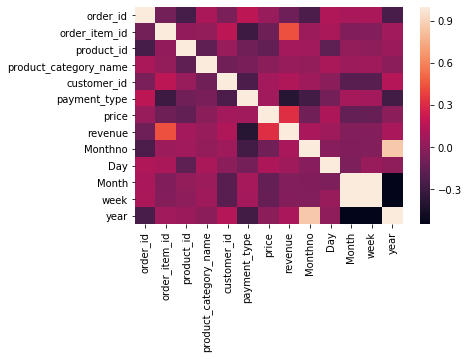

In [157]:
import seaborn as sns
sns.heatmap(corrmat,xticklabels=corrmat.columns,
        yticklabels=corrmat.columns)

In [158]:
#dropped coloumns having high co-linearity
df=df.drop(['year','Month','day'],axis=1)

In [159]:
corrmatnew =df.corr()

In [160]:
import seaborn as sns
sns.heatmap(corrmatnew,xticklabels=corrmat.columns,
        yticklabels=corrmat.columns)

### <font color="blue">Feature Engineering(variable selection)</font>

In [161]:
df=df.drop('order_date', axis=1)

In [162]:
validation_data=df[df['Monthno'].isin(['21.0','20.0'])]

In [163]:
train_data=df.loc[0:903982]

In [164]:
X = train_data.drop(['revenue'] ,axis=1)
y = train_data['revenue'] 

In [165]:
#X.to_csv('X_data_finalbig.csv')
#y.to_csv('y_data_finalbig.csv')

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape,X_test.shape

((507677, 10), (217576, 10))

In [167]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [168]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [171]:
## Feature selection of most predictive features using lasso regression.
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [172]:
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))
# printing the selected features
selected_feats

total features: 10
selected features: 10
features with coefficients shrank to zero: 0


Index(['order_id', 'order_item_id', 'product_id', 'product_category_name',
       'customer_id', 'payment_type', 'price', 'Monthno', 'Day', 'week'],
      dtype='object')

In [173]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]

selected_feats

Index(['order_id', 'order_item_id', 'product_id', 'product_category_name',
       'customer_id', 'payment_type', 'price', 'Monthno', 'Day', 'week'],
      dtype='object')

### <font color="red">All columns have the best feature with respect to revenue column</font>

### <font color="blue">Checking if any column is overfitting</font>

In [174]:
X = df
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
print(overfit) 

[]


### <font color="red">Overfit is empty i.e. no overfitting</font>

## <font color="orange">Building regression models</font>

In [175]:
X_train = train_data.drop('revenue', axis = 1)
Y_train = train_data['revenue']
X_test = X_train


In [176]:
X_train

order_id  order_item_id  product_id  product_category_name  \
0       0.622949           0.00    0.166651                     72   
1       0.208966           0.05    0.176702                     44   
2       0.208966           0.05    0.176702                     44   
3       0.208966           0.05    0.176702                     44   
4       0.208966           0.05    0.176702                     44   
...          ...            ...         ...                    ...   
903978  0.297460           0.10    0.866840                     13   
903979  0.634999           0.00    0.043789                     11   
903980  0.331390           0.05    0.287163                     53   
903981  0.297460           0.10    0.866840                     13   
903982  0.297460           0.10    0.866840                     13   

        customer_id  payment_type   price  Monthno  Day  week  
0          0.560714             1   89.90      1.0    6    40  
1          0.104575             0   38.00      1.0    7    40  
2          0.104575             0   38.00      1.0    7    40  
3          0.104575             0   38.00      1.0    7    40  
4          0.104575             0   38.00      1.0    7    40  
...             ...           ...     ...      ...  ...   ...  
903978     0.330732             3   29.99     19.0    7    23  
903979     0.010045             1   66.71     19.0    3    22  
903980     0.427380             3  139.00     19.0   13    24  
903981     0.330732             3   29.99     19.0    7    23  
903982     0.330732             3   29.99     19.0    7    23  

[725253 rows x 10 columns]

In [177]:
Y_train

0         117.86
1         218.87
2         218.87
3         218.87
4         218.87
           ...  
903978     39.42
903979     74.10
903980     27.11
903981     39.42
903982     39.42
Name: revenue, Length: 725253, dtype: float64

In [178]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
from math import sqrt

In [179]:
#Defining folds and score functions

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X_train=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [180]:
#Defining models
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=10000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                      max_depth=3, min_child_weight=0,
                                      gamma=0, subsample=0.7,
                                      colsample_bytree=0.7,
                                      objective='reg:linear', nthread=-1,
                                      scale_pos_weight=1, seed=27,
                                      reg_alpha=0.00006)



# seting up models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, 
# while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(ridge, elasticnet, lightgbm),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)

In [181]:
# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'xgboost': xgboost}
predictions = {}
scores = {}

#Training the models
for name, model in models.items():
    
    model.fit(X_train, Y_train)
    predictions[name] = np.expm1(model.predict(X_test))   #This mathematical function helps user to calculate exponential of all the elements subtracting 1 from all the input array elements.
    score = cv_rmse(model, X_train=X_train)
    scores[name] = (score.mean(), score.std())
    
#Validating and training each model
#performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgboost)
print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  
C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  
C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  
C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


[11:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


[11:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[12:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
---- Score with CV_RMSLE-----
Ridge score: 443.8525 (3.6034)

Lasso score: 443.8525 (3.6033)

ElasticNet score: 443

In [182]:
#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X_train, Y_train)
print('Lasso')
lasso_model = lasso.fit(X_train, Y_train)
print('Ridge')
ridge_model = ridge.fit(X_train, Y_train)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, Y_train)

print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, Y_train)


print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(Y_train))

#Blend model prediction
def blend_models_predict(X_test):
    return ((0.2  * elastic_model.predict(X_test)) + \
            (0.25 * lasso_model.predict(X_test)) + \
            (0.2 * ridge_model.predict(X_test)) + \
            (0.15 * lgb_model_full_data.predict(X_test)) + \
             (0.1 * xgb_model_full_data.predict(X_test)) + \
            (0.2 * stack_gen_model.predict(np.array(X_test))))
pred =  blend_models_predict(X_test)

----START Fit---- 2020-04-19 13:48:46.561462
Elasticnet
Lasso
Ridge
lightgbm
xgboost
[13:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
stack_gen


## <font color="orange">Evaluation of the regression models of larger dataset</font>

In [183]:
print('RMSLE score on train data:')
print(rmsle(Y_train,pred))


error = mean_squared_error(Y_train, pred)
print('Test MSE: %.3f' % error)
rmse = sqrt(error)
print('Test rmse: %.3f' % rmse)

from sklearn.metrics import r2_score
r2score = r2_score(Y_train, pred,sample_weight=None, multioutput='uniform_average')
print('R Squared value: %.3f' % r2score)

#Mean absolute percantage error
num = abs(pred-Y_train).sum()
den = abs(Y_train).sum()

mape = (num/den)*100
print('MAPE: %3f' %mape)

RMSLE score on train data:
278.7630605965894
Test MSE: 77708.844
Test rmse: 278.763
R Squared value: 0.774
MAPE: 67.477121


Text(0, 0.5, 'Predicted revenue')

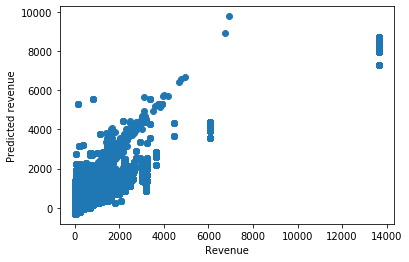

In [184]:
plt.scatter(Y_train,pred)
plt.xlabel('Revenue')
plt.ylabel('Predicted revenue')

<ul style="list-style-type:disc;" size=5>
  <li>After applying five best regression algorithms on revenue column.</li>

  <li>Accuracy of the model is 100-MAPE =100-67.47712 =32.5229% </li>
  <li>Accuracy compared to smaller dataset is very low and it depends on the data and it's column values.</li>
  <li>Data choosed as larger data set is a original data and not a made up dataset so it has few repeatative values in large numbers in dependent variable(Y_train) and this values cannot be dropped as it will reduce the size of the dataset and  such cases happens in real business scenario.</li>
  <li>After applying box cox and log transformation to normalize the revenue column, values get converted to nan, infinite which was not in an appropriate format to apply ml algorithms.</li>
</ul>

<table>
  <tr>
    <th>Statistical measures</th>
    <th>Regression model</th>
    <th>Time-Series Analysis</th>
  </tr>
  <tr>
    <td>Smaller data-Mape</td>
    <td>10.00</td>
    <td>56.43</td>
  </tr>
  <tr>
    <td>Accuracy in percentage</td>
    <td>90%</td>
    <td>43.73</td>
  </tr>
  <tr>
    <td>Larger data-Mape</td>
    <td>32.5229%</td>
    <td>25.29</td>
  </tr>
  <tr>
    <td>Accuracy in percentage</td>
    <td>32.52%</td>
    <td>74.71</td>
  </tr>
  
</table>

### <font color="orange">Conclusion for best model, ARIMA or regression to use for prediction!.</font>

* To predict/forecast sales revenue of ecommerce data, time-series and regression models has been applied.
* Larger data set gave good accuracy as compared to smaller dataset in time-series analysis.
* Time-series approaches for sales forecasting has limitations, such as it needs to have historical data for a long time period to capture seasonality.
* Regression algorithms captures the patterns which exist in the whole set of stores or products to predict future sales.
* Hence, sales prediction is rather a regression problem than a time series problem as we can find complicated patterns in sales dynamics and it is independent of size and shape of the dataset.
* Whereas to forecast future sales, it is simple using time-series ARIMA model as it requires only two column price and daterange.

                                                                                                   Thank You